# My mood in 2019

At the end of 2018, while surfing 9gag, I saw a guy sharing his mood records over the year. "Wow, that's so cool" was what I thought. Thus, I decided that this year I would do the same, i.e. recording my emotions, mood, and thinking over the year and do some visualization of it at the end. This is also the first "fun" data science project of mine, so the pros out there, please don't laugh :)

To record the data, I used the mobile app [pixel](https://play.google.com/store/apps/details?id=ar.teovogel.yip&hl=en_SG). With this app, each day you can rate your **mood** (1 as lowest, 5 as highest), indicate your **emotions** ("happiness", "motivation", etc.) and write a short **note**, like a 1-sentence diary. The data can be exported to json format for analysis.



In [54]:
# Standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import random
import json

# Text processing libs
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dangminh.nguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangminh.nguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dangminh.nguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dangminh.nguyen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/dangminh.nguyen/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# Library for plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize':18
    
}
rcParams.update(params)
rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 100

#%matplotlib inline

## Helper functions

In [3]:
def aggregate_df(df, attribute, agg_func):
    agg_df = df.groupby(attribute).agg(agg_func)
    agg_df.columns = ['_'.join(col)for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    return agg_df

In [4]:
import itertools, collections

def extract_popular_emo(input_list,max_count=3):
    output = []
    counter = collections.Counter(input_list)
    most_popular = counter.most_common()
    for i in range(max_count):
        output.append(most_popular[i][0])
        output.append(most_popular[i][1])
    
    return output

In [5]:
data_path = "data/Pixels backup: 2019-12-28 18:03:29.160.json"
df_orig = pd.read_json(data_path)
df_orig['date'] = pd.to_datetime(df_orig['date'], format='%d%b%Y')
df_orig.head()

,date,mood,emotions,notes
0,2019-01-07,4,[motivation],
1,2019-01-08,3,"[motivation, regret]",
2,2019-01-09,3,"[envy, nerves, emptiness]",
3,2019-01-10,3,"[dissappointment, motivation]",
4,2019-01-11,3,"[emptiness, chill]",


In [6]:
df_process = df_orig
df_process['month'] = df_orig['date'].dt.month
df_process['day'] = df_orig['date'].dt.day
df_process['day_of_week'] = df_orig['date'].dt.dayofweek
df_process['week'] = df_orig['date'].dt.week

In [7]:
day_of_week = ('Mon','Tue','Wed','Thu','Fri','Sat','Sun')
x_idx = np.arange(0,7,1)

# Daily Mood

## Overall

Text(0.5, 1.0, 'Overall mood count')

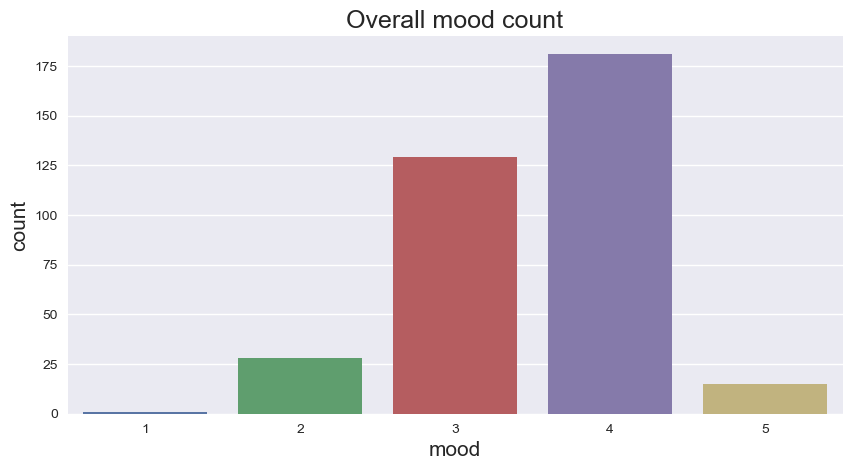

In [8]:
sns.countplot(x='mood', data=df_process)
plt.title("Overall mood count")

## By week

My mood is super good around March, when I got married, and dropped significantly after I started working. Looks like work is not good for your mental health after all.

In [9]:
attr = ['week']
agg_func = {
    'mood':['mean','std']
}
df_tmp = aggregate_df(df_process, attr, agg_func)

(2.5, 4.5)

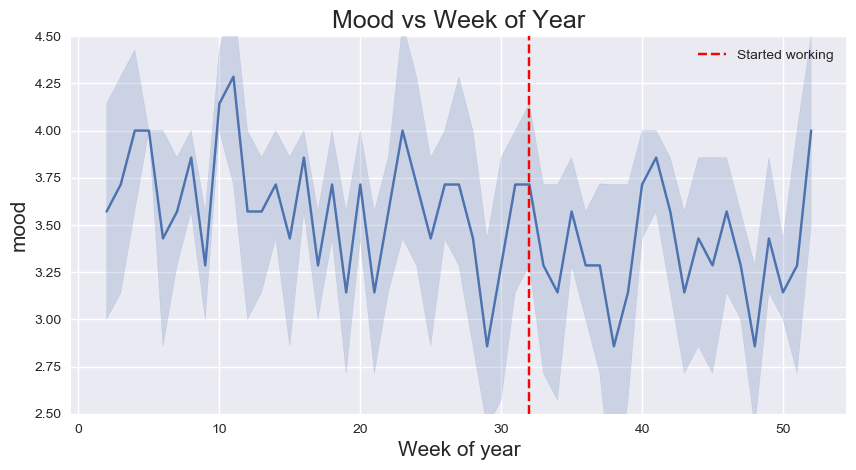

In [10]:
sns.lineplot(x='week',y='mood',data=df_process)
plt.axvline(x=32, linestyle = '--',color='r', label='Started working')
plt.title('Mood vs Week of Year')
plt.xlabel('Week of year')
plt.legend(loc='best')
plt.ylim(2.5,4.5)

## By month

Text(0.5, 1.0, 'Mood vs Month')

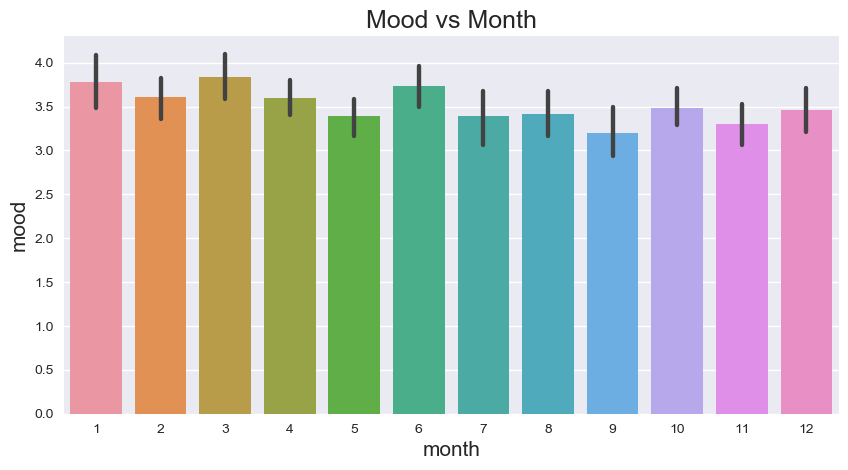

In [11]:
sns.barplot(x='month', y='mood',data=df_process)
plt.title('Mood vs Month')

## By day of week

([<matplotlib.axis.XTick at 0x108ac9d10>,
 <a list of 7 Text xticklabel objects>)

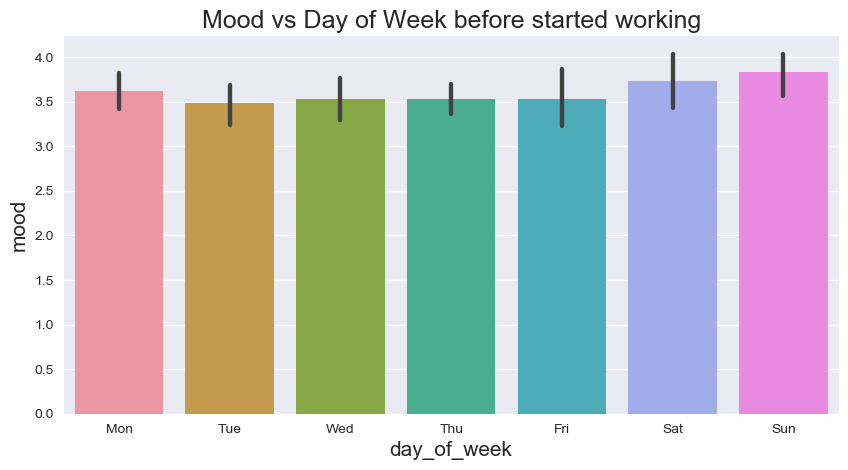

In [12]:
# Before work
df_tmp = df_process[df_process['week']<32]
sns.barplot(x='day_of_week', y='mood',data=df_tmp)
plt.title('Mood vs Day of Week before started working')
plt.xticks(x_idx, day_of_week)

([<matplotlib.axis.XTick at 0x1098477d0>,
 <a list of 7 Text xticklabel objects>)

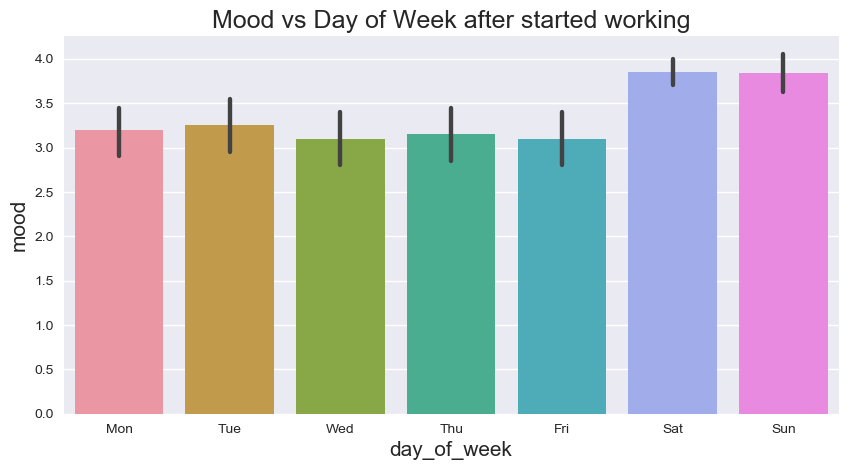

In [13]:
# After work
df_tmp = df_process[df_process['week']>32]
sns.barplot(x='day_of_week', y='mood',data=df_tmp)
plt.title('Mood vs Day of Week after started working')
plt.xticks(x_idx, day_of_week)

Before started working in the industry, I spent most of my days, either weekdays or weekends staying at home, writing my thesis, applying for jobs and preparing for interview. Thus, the mood is quite stable throughout the week. But you can see how I treasure weekend after going to work.

Text(0.5, 1.0, 'Mood vs Day Of Month')

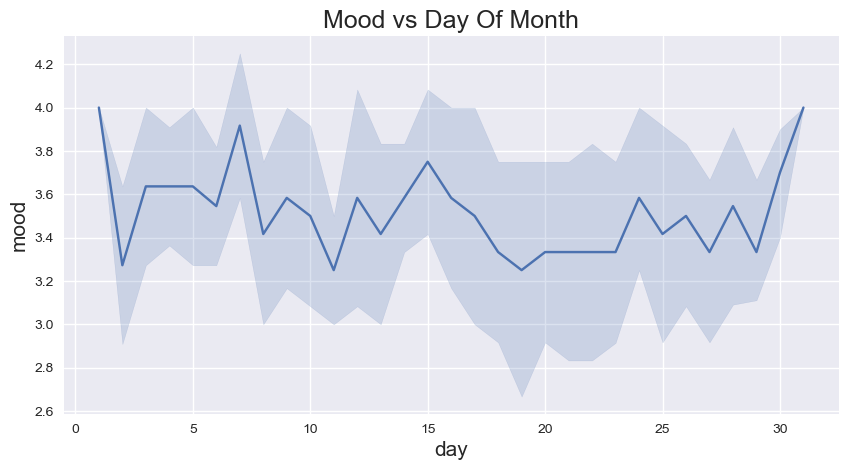

In [14]:
sns.lineplot(x='day', y='mood',data=df_process)
plt.title('Mood vs Day Of Month')

# Daily emotions

## Overall

In [15]:
all_emo = df_process['emotions'].sum()
counter = collections.Counter(all_emo)
emotions = []
counts = []
for i in range(12):
    emotions.append(counter.most_common()[i][0])
    counts.append(counter.most_common()[i][1])
    
df_tmp = pd.DataFrame()
df_tmp['emotions'] = emotions
df_tmp['counts'] = counts

Text(0.5, 1.0, 'Count by Emotions')

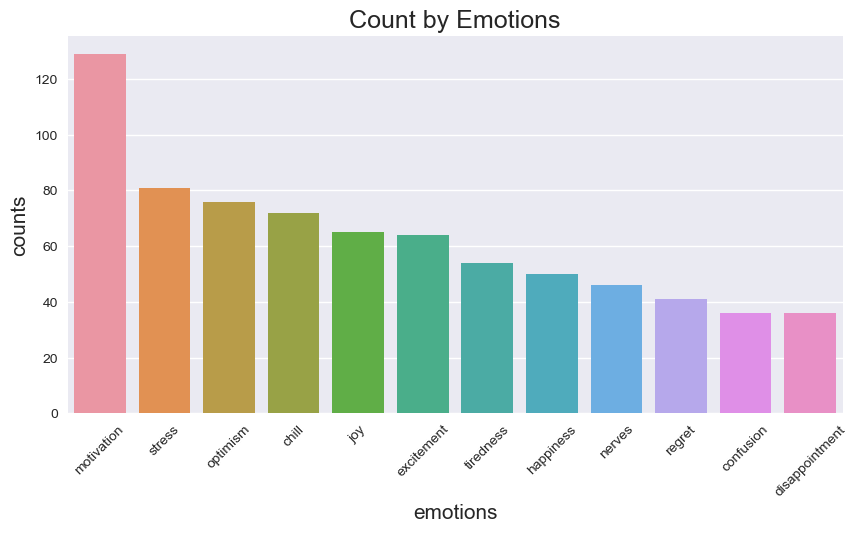

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.barplot(x='emotions', y='counts',data=df_tmp)
ax.tick_params(axis='x', rotation=45)
plt.title("Count by Emotions")

For half a year, I am a poor PhD student desperately looking for job in a different industry. For another half, I am a newbie struggling with the new working environment, with the kind of pressure that I have never experienced before. Definitely will not be able to go through all that without motivation.

## By month

In [17]:
attr = ['month']
agg_func = {
    'emotions':['sum']
}


life_events = ['Union with fiancee', 
               'Chinese New Year', 
               'Getting married', 
               'Applying for job', 
               'Applying for job',
              'Getting job offers',
              'Preparing for first working experience',
              'First month working',
              'Struggling at work',
              'Job switching',
              'Wrapping things up at old company',
              'Starting at the new company']

df_tmp = aggregate_df(df_process, attr, agg_func)
df_tmp['life events'] = life_events
df_tmp['emo1'], df_tmp['count1'], df_tmp['emo2'], df_tmp['count2'], df_tmp['emo3'], df_tmp['count3'] = zip(*df_tmp['emotions_sum'].map(extract_popular_emo))

df_tmp = df_tmp.drop(['emotions_sum'],axis=1)
df_tmp.head(20)

,month,life events,emo1,count1,emo2,count2,emo3,count3
0,1,Union with fiancee,happiness,14,joy,7,motivation,6
1,2,Chinese New Year,motivation,13,stress,9,happiness,6
2,3,Getting married,excitement,11,joy,10,happiness,9
3,4,Applying for job,motivation,20,excitement,12,stress,10
4,5,Applying for job,motivation,17,stress,13,optimism,11
5,6,Getting job offers,motivation,11,chill,10,optimism,10
6,7,Preparing for first working experience,joy,10,tiredness,7,chill,7
7,8,First month working,motivation,16,optimism,12,stress,8
8,9,Struggling at work,stress,13,disappointment,11,motivation,11
9,10,Job switching,chill,10,regret,8,motivation,8


Looks like all key emotions are strongly correlated with my life events

### By week

In [18]:
attr = ['day_of_week']
agg_func = {
    'emotions':['sum']
}

df_tmp = aggregate_df(df_process[df_process['week']<32], attr, agg_func)
df_tmp['emo1'], df_tmp['count1'], df_tmp['emo2'], df_tmp['count2'], df_tmp['emo3'], df_tmp['count3'] = zip(*df_tmp['emotions_sum'].map(extract_popular_emo))

df_tmp = df_tmp.drop(['emotions_sum'],axis=1)
print('Before started working')
df_tmp.head(20)

Before started working


,day_of_week,emo1,count1,emo2,count2,emo3,count3
0,0,optimism,10,motivation,9,nerves,6
1,1,motivation,13,chill,8,optimism,7
2,2,motivation,8,excitement,7,happiness,6
3,3,motivation,15,excitement,8,tiredness,7
4,4,motivation,10,chill,7,happiness,6
5,5,joy,9,motivation,9,happiness,8
6,6,motivation,14,excitement,11,joy,10


In [19]:
attr = ['day_of_week']
agg_func = {
    'emotions':['sum']
}

df_tmp = aggregate_df(df_process[df_process['week']>32], attr, agg_func)
df_tmp['emo1'], df_tmp['count1'], df_tmp['emo2'], df_tmp['count2'], df_tmp['emo3'], df_tmp['count3'] = zip(*df_tmp['emotions_sum'].map(extract_popular_emo))

df_tmp = df_tmp.drop(['emotions_sum'],axis=1)
print('After started working')
df_tmp.head(20)

After started working


,day_of_week,emo1,count1,emo2,count2,emo3,count3
0,0,motivation,8,optimism,7,disappointment,6
1,1,stress,8,disappointment,6,chill,5
2,2,motivation,8,stress,8,tiredness,6
3,3,stress,9,optimism,7,motivation,7
4,4,motivation,9,stress,8,disappointment,7
5,5,chill,9,joy,8,motivation,4
6,6,joy,9,motivation,7,chill,6


After started working, stress becomes the dominant keyword in replacement of motivation :(

# Daily notes

In [70]:
# Preprocess text
lemmatizer = WordNetLemmatizer()
StopWords = stopwords.words('English')
removed_words = ['nice',' day','thing','good']

def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-zA-Z\\s]", "",sentence)
    sentence = sentence.strip()  
    for word in removed_words:
        sentence = re.sub(word,'',sentence)
    return sentence

def preprocess_text(sentence):
    sentence = clean_text(sentence)
    tokens = nltk.word_tokenize(sentence)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if len(token)>=2 and token not in StopWords]
    sentence = ' '.join(tokens)
    return sentence

In [71]:
df_tmp = df_orig
df_tmp['text_clean'] = df_orig['notes'].apply(lambda x: preprocess_text(x))

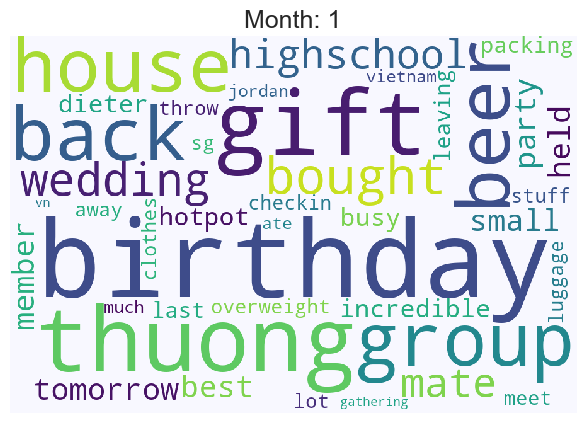

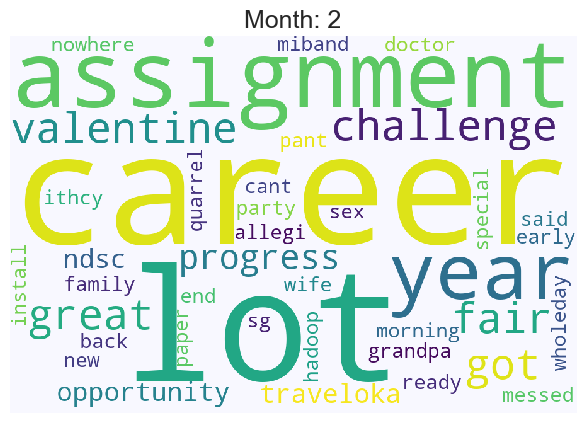

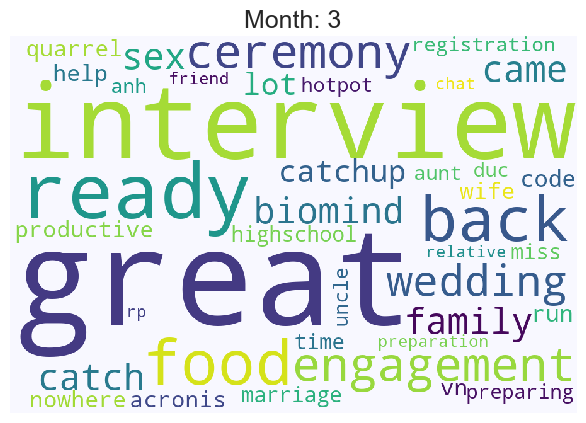

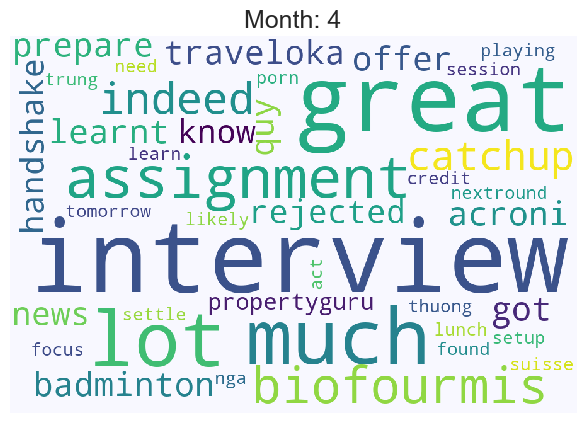

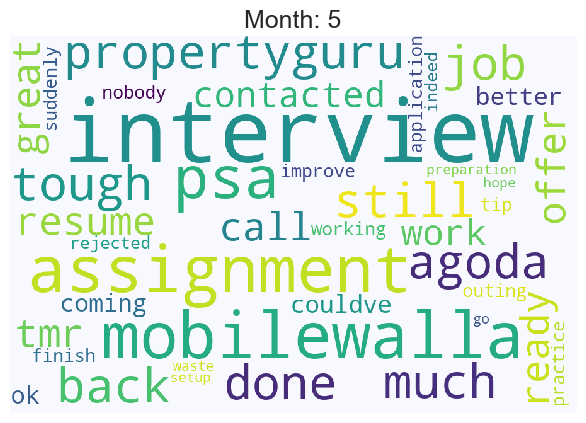

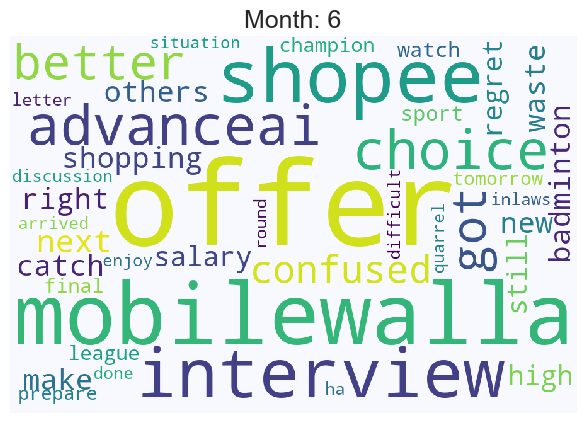

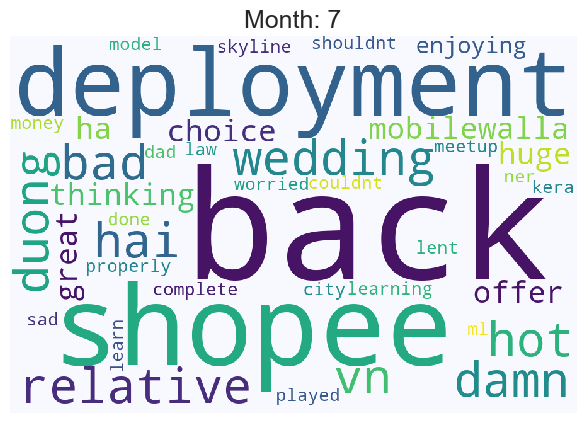

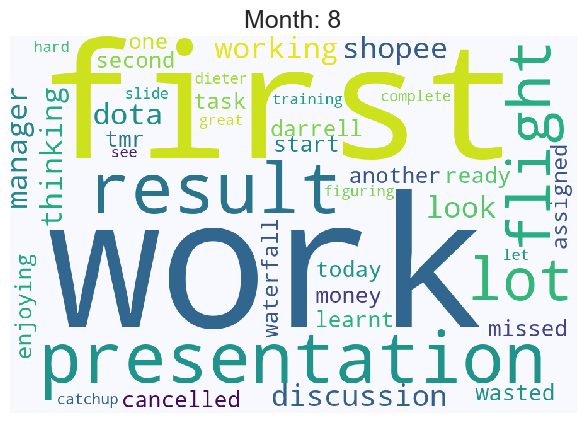

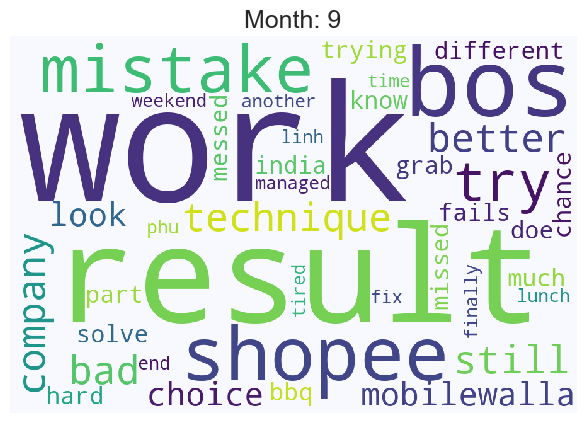

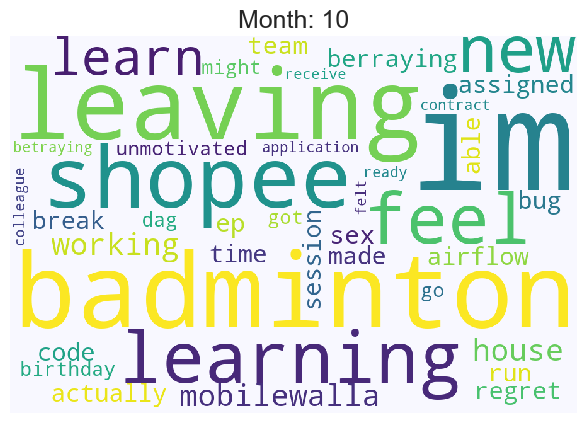

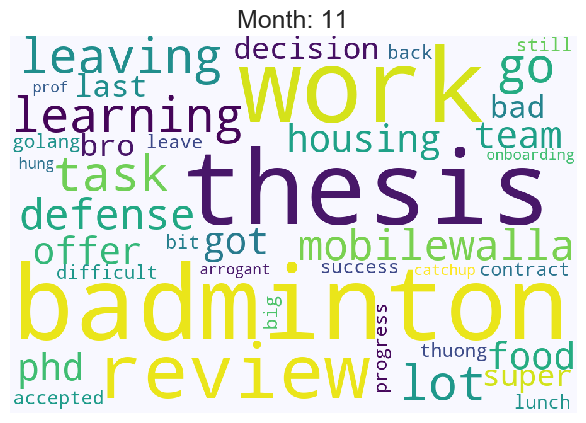

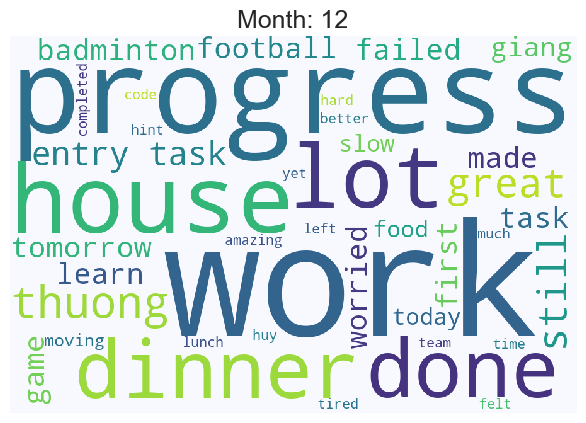

In [72]:
for i in range(1,13):
    df_month = df_tmp[df_tmp['month']==i]
    words = df_month['text_clean']
    cloud = WordCloud(background_color='ghostwhite',
                        width=900,
                        height=600,
                         max_words=40).generate(' '.join(words))
    fig = plt.figure(figsize=(10,5))
    plt.imshow(cloud)
    plt.title('Month: %i'%i)
    plt.axis('off')
    plt.show()

In these words lie the important events of the month, some of my thoughts, the company that I applied for and many more

# Final remarks


2019 marks many important events for me. Just to name a few:

* Got married to a beautiful wife
* Had my PhD defense
* Left academia and started working in industry
* Left my first job as I see a mismatch and change to my current company (Shopee)

"Nothing can be done without a proper preparation". I have prepared quite a lot in the last two years for the wedding, as well as to make the jump, from Academic to Industry, from Physics to Machine Learning. Luckily, 2019 has been nice to me and I thank all my family, friends and my wife for that. 2020 will be even more challenging and I will do my best. I will keep recording my moods and let's see what the results look like 1 year from now.

### MERRY CHRISTMAST AND HAPPY NEW YEAR EVERY ONE!